In [1]:
import numpy as np
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

In [80]:
sodalime = ml.open_material('sodalime', 'Material')
SiN = ml.open_material('SiN', 'Sellmeier')
SiO2 = ml.open_material('SiO2', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')
Acrylic = ml.open_material('Acrylic', 'Sellmeier')
air = ml.Non_Dispersion(1)
ml_t = ml.Non_Dispersion(1.91592661)
ml_t2 = ml.Non_Dispersion(1.8)
LOCA = ml.Non_Dispersion(1.4)

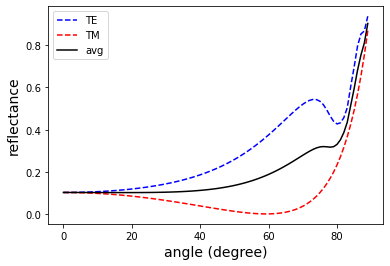

In [44]:
TE = []
TM = []
Ravg = []
angle = []
wl = np.linspace(400, 700, 50)

model = tm.Design([air, SiO2, SiN, sodalime], [None, 20, 20, None])
for a in range(0, 90):
    S = sum(model.reflectance(wl, a, 'S'))/np.size(wl)
    P = sum(model.reflectance(wl, a, 'P'))/np.size(wl)
    TE.append(S)
    TM.append(P)
    Ravg.append((S+P)/2)
    angle.append(a)
plt.plot(angle, TE, 'b--', label = 'TE')
plt.plot(angle, TM, 'r--', label = 'TM')
plt.plot(angle, Ravg, 'k', label = 'avg')
plt.legend(loc = 'best') 
plt.xlabel('angle (degree)', fontsize=14)
plt.ylabel('reflectance', fontsize=14)
plt.savefig('abg.png')
plt.show()

In [19]:
x = 550
ITO.nvalues(550)
SiO2.nvalues(550)
sodalime.nvalues(550)

array(1.52513873)

In [39]:
target_R  = tm.Design([air, sodalime], [None, None]).reflectance(x)
hypo_R = lambda th: tm.Design([air, SiO2, ITO, SiO2, sodalime], [None, th[0], 20, None]).reflectance(x)
fom = lambda th: abs(hypo_R(th) - target_R)
res = minimize(fom, [100])
print(res)
print(hypo_R(res.x))
print(target_R)

      fun: 5.927681956396924e-12
 hess_inv: array([[20554.15089131]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 117
      nit: 2
     njev: 39
   status: 0
  success: True
        x: array([77.5024611])
[0.04324915]
[0.04324915]


In [58]:
def fom(th):
    ml_t.n = th[0]
    d = th[1]
    R1 = np.mean(tm.Design([air, SiO2, ml_t, sodalime],[None, 1000, d, None]).reflectance(wl))
    R2 = np.mean(tm.Design([air, SiO2, ITO, ml_t, sodalime],[None, 1000, 20, d, None]).reflectance(wl))
    print(R1, R2)
    return abs(R1 - R2)

In [57]:
differential_evolution(fom, [(0, 2), (0, 200)])

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4623
     nit: 151
 success: True
       x: array([  1.91592661, 119.13512789])

In [59]:
fom([1.91592661, 119.13512789])

0.04936838081871455 0.04936838084852394


2.98093910666708e-11

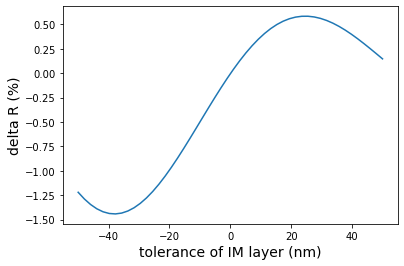

0.005829926858648846 -0.01442604532805676


In [125]:
hypo_1 = lambda d: np.mean(tm.Design([air, SiO2, ITO, ml_t, sodalime],
                                     [None, 1000, 20, d, None]).reflectance(wl))
hypo_1_r = lambda d: np.mean(tm.Design([air, SiO2, ml_t, sodalime],
                                       [None, 1000, d, None]).reflectance(wl))
tol = []
Ri = []
x = 50
for i in np.linspace(-x,x):
    tol.append(i)
    Ri.append(hypo_1(119+i)-hypo_1_r(119+i))
plt.plot(tol, np.array(Ri)*100)
plt.xlabel('tolerance of IM layer (nm)', fontsize = 14)
plt.ylabel('delta R (%)', fontsize = 14)
plt.savefig('tol.png')
plt.show()
print(max(Ri), min(Ri))

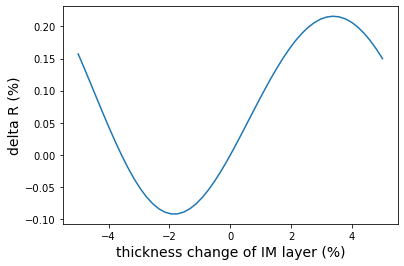

In [120]:
hypo_2 = lambda d: np.mean(tm.Design([air, ml_t2, ITO, sodalime],
                                     [None, d, 20, None]).reflectance(wl))
hypo_2_r = lambda d: np.mean(tm.Design([air, ml_t2, sodalime],
                                       [None, d, None]).reflectance(wl))
tol_2 = []
Ri_2 = []
for i in np.linspace(-0.05, 0.05):
    tol_2.append(i)
    Ri_2.append(hypo_2(1000*(1+i))-hypo_2_r(1000*(1+i)))
plt.plot(np.array(tol_2)*100, np.array(Ri_2)*100)
plt.xlabel('thickness change of IM layer (%)', fontsize = 14)
plt.ylabel('delta R (%)', fontsize = 14)
plt.savefig('f.png')
plt.show()

In [16]:
wl = np.linspace(400, 700)
SiO2_LENS = ml.open_material('SiO2_LENS', 'Sellmeier') 
SiN_LENS = ml.open_material('SiN_LENS', 'Sellmeier')
ITO_LENS = ml.open_material('ITO_LENS', 'Sellmeier')
OC_LENS = ml.open_material('OC_LENS', 'Material')
OC_HRI_LENS = ml.open_material('OC_HRI_LENS', 'Material')

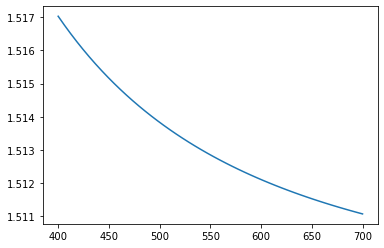

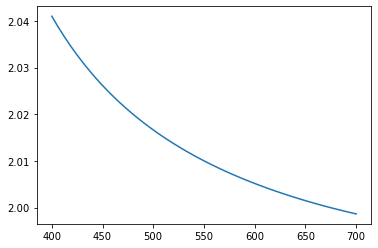

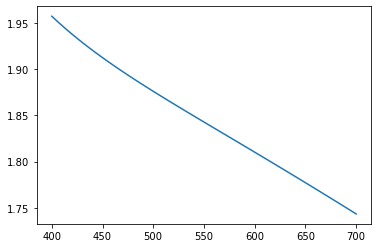

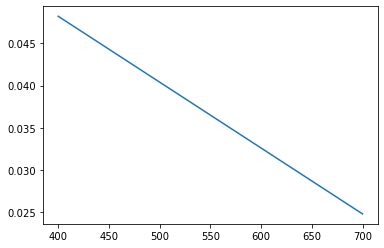

In [29]:
plt.plot(wl, SiO2_LENS.nvalues(wl))
#plt.savefig('SiO2_LENS_n.png')
plt.show()
plt.plot(wl, SiN_LENS.nvalues(wl))
#plt.savefig('SiN_LENS_n.png')
plt.show()
plt.plot(wl, ITO_LENS.nvalues(wl))
#plt.savefig('ITO_LENS_n.png')
plt.show()
plt.plot(wl, ITO_LENS.kvalues(wl))
plt.savefig('ITO_LENS_k.png')
plt.show()

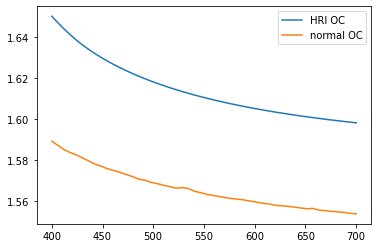

In [26]:
plt.plot(wl, OC_HRI_LENS.nvalues(wl), label = 'HRI OC')
plt.plot(wl, OC_LENS.nvalues(wl), label = 'normal OC')
plt.legend(loc = 'best')
plt.savefig('OC.png')
plt.show()